In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

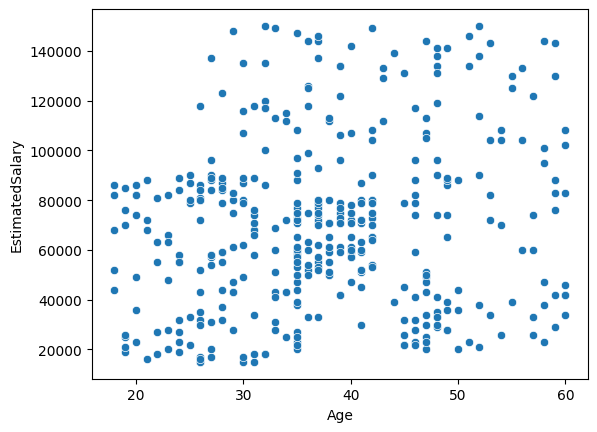

In [4]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [5]:
# Split the data into ind variable and dep variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Building DNN/MLP

# Case 1 - MLP without Feature Scaling

In [11]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
10/10 [==============================] - 6s 29ms/step - loss: 4314.7710 - accuracy: 0.6344 - val_loss: 1924.3229 - val_accuracy: 0.6750
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 1022.8729 - accuracy: 0.4844 - val_loss: 1231.9176 - val_accuracy: 0.3250
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 661.3624 - accuracy: 0.4031 - val_loss: 354.6508 - val_accuracy: 0.6750
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 325.1151 - accuracy: 0.5781 - val_loss: 265.8756 - val_accuracy: 0.3250
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 112.3057 - accuracy: 0.5094 - val_loss: 29.6190 - val_accuracy: 0.3250
Epoch 6/100
10/10 [==============================] - 0s 22ms/step - loss: 34.5554 - accuracy: 0.4875 - val_loss: 43.5381 - val_accuracy: 0.3250
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 57.8612 - accuracy: 0.4844 - val_loss: 66.8485 - 

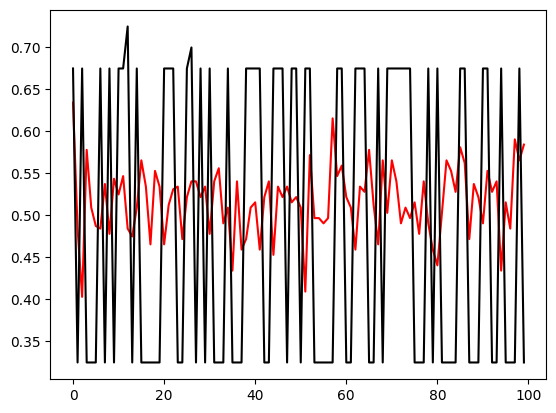

In [14]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')

# Case 2 : MLP with Feature Scaling - Mandatory steps

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [16]:
from keras.layers import BatchNormalization
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history1 = model1.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test))

Epoch 1/100
10/10 [==============================] - 3s 69ms/step - loss: 0.6729 - accuracy: 0.6438 - val_loss: 0.6399 - val_accuracy: 0.6750
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6161 - accuracy: 0.7906 - val_loss: 0.5858 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.5677 - accuracy: 0.8375 - val_loss: 0.5400 - val_accuracy: 0.8000
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5285 - accuracy: 0.8469 - val_loss: 0.4997 - val_accuracy: 0.8125
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.4949 - accuracy: 0.8469 - val_loss: 0.4648 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8531 - val_loss: 0.4350 - val_accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4383 - accuracy: 0.8500 - val_loss: 0.4089 - val_accuracy: 0.8375
Epoch 8/

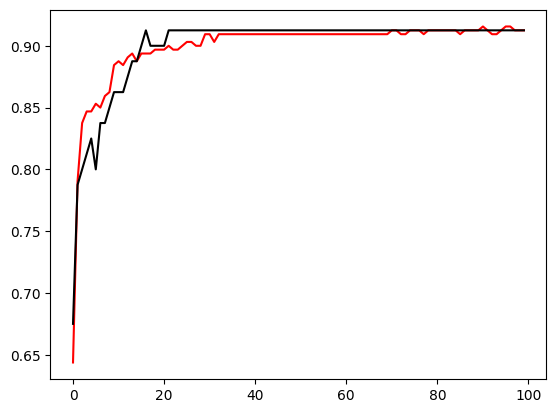

In [19]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')

# Case 3 - Early Stopping - can also handle overfitting problem

In [20]:

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import EarlyStopping

# Dummy data
from sklearn.datasets import make_circles

In [22]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [40]:
x

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [24]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

<Axes: >

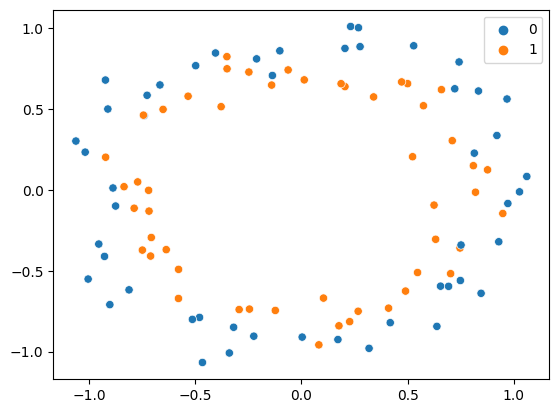

In [25]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [56]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               768       
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
import time

# Without Early Stoping

In [58]:
start = time.time()
history = model.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test))
print(time.time()-start)

Epoch 1/3500
3/3 [==============================] - 1s 80ms/step - loss: 0.6953 - accuracy: 0.5125 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 3/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6907 - accuracy: 0.5375 - val_loss: 0.7041 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6891 - accuracy: 0.5375 - val_loss: 0.7055 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6875 - accuracy: 0.5250 - val_loss: 0.7072 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6865 - accuracy: 0.5375 - val_loss: 0.7090 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6858 - accuracy: 0.4875 - val_loss: 0.7101 - val_accuracy: 0.3500
Epoch 8/3500


KeyboardInterrupt: ignored

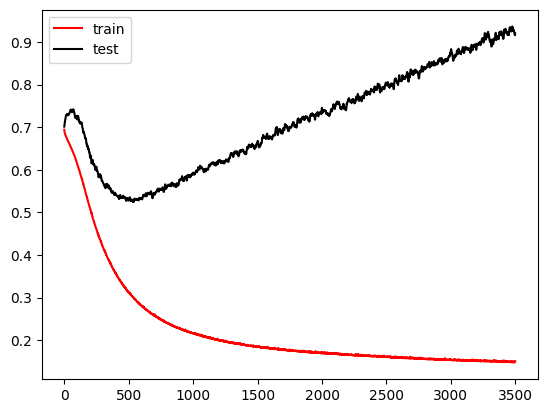

In [33]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='black', label='test')
plt.legend()
plt.show()

# Using EarlyStopping Method

In [46]:
model1 = Sequential()
model1.add(Dense(256, activation = 'relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               768       
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [47]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# EarlyStopping

callback = EarlyStopping(monitor='val_loss', min_delta=0.001, 
                         patience=30, verbose=1) 


In [52]:
start = time.time()
history1 = model1.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test),
                     callbacks=callback)
print(time.time()-start)

Epoch 1/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6533 - accuracy: 0.5875 - val_loss: 0.7263 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.6527 - accuracy: 0.5875 - val_loss: 0.7272 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6521 - accuracy: 0.5875 - val_loss: 0.7278 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6513 - accuracy: 0.5875 - val_loss: 0.7282 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6505 - accuracy: 0.6000 - val_loss: 0.7280 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6498 - accuracy: 0.6000 - val_loss: 0.7271 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6491 - accuracy: 0.6125 - val_loss: 0.7267 - val_accuracy: 0.3500
Epoch 8/3500


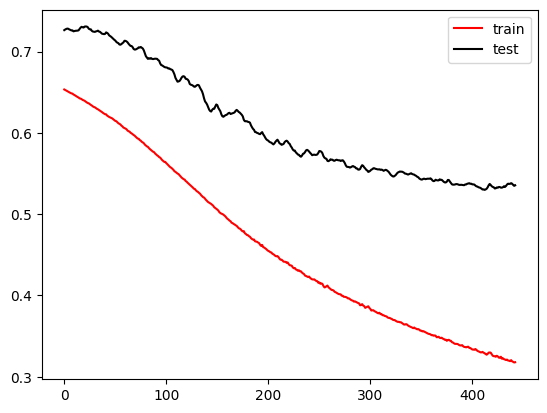

In [53]:
plt.plot(history1.history['loss'], color='red', label='train')
plt.plot(history1.history['val_loss'], color='black', label='test')
plt.legend()
plt.show()

# Vanishing Gradient Problem

In [ ]:
# Theory + Code
# Backpropogation mathod - chain rule and memoization + ForewardPropgation
# Optimization - GD,SGD,MBGD,Momentum,NAG,EWMA,ADAGRAD,ADADELTA,ADAM, RMSPROP,NADAM ETC
# Regularisation method - L1 and L2 (Ridge and Losso)
# Dropout , BatchNormalization, Keras Tuner